In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
def show_image(image, title = 'Image', cmap_type = 'gray'):
    plt.imshow(image, cmap = cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [4]:
def gray_to_rgb(image: np.array):
    """
    return RGB image corresponding input greyscale image
    """
    height, width = image.shape[0], image.shape[1]
    rgb = np.zeros(shape = [height, width, 3], dtype = image.dtype)
    rgb[:,:,0] = image
    rgb[:,:,1] = image
    rgb[:,:,2] = image
    return rgb

In [5]:
def rgb_to_gray(image: np.ndarray):
    """
    return greyscale image corresponding input RGB image
    """
    height, width = image.shape[0], image.shape[1]
    greyscale_image = np.zeros(shape = [height, width], dtype = image.dtype)
    greyscale_image[:,:] = 0.2989*image[:,:,0] + 0.5870*image[:,:,1] + 0.1140*image[:,:,2]
    return greyscale_image

In [44]:
def rescale_image(image: np.ndarray):
    
    """
    linear rescaling of image values to 0 - 255 range
    
    PARAMETERS
    image: image as np.array
    
    RETURNS
    rescaled: image rescaled to 0 - 255 range
    """
    
    min_value = np.min(image)
    max_value = np.max(image)
    rescaled = np.array(255.0 * (image - min_value) / (max_value - min_value), dtype = np.uint8)
    return rescaled

In [24]:
def sobel(image: np.ndarray):
    
    """
    apply sobel operator to intensify edges
    
    PARAMETERS
    image: 2-dimensional greyscale image
    
    RETURNS
    result: 2-dimensional greyscale image after applying sobel operator to 'image'
    """
    
    height, width = image.shape[0], image.shape[1]
    horizontal_mask = np.array([[-1, -2, -1],
                     [0, 0, 0],
                     [1, 2, 1]])
    vertical_mask = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])
    result = np.zeros(shape = [height, width], dtype = np.uint8)
    for x in range(1,height-1):
        for y in range(1,width-1):
            grad_y = np.sum(horizontal_mask * image[x-1:x+2, y-1:y+2])
            grad_x = np.sum(vertical_mask * image[x-1:x+2, y-1:y+2])
            grad = np.sqrt(grad_x**2 + grad_y**2)
            result[x,y] = grad
    #result = normalize_image(result)
    return result

In [8]:
def salt_and_pepper(image: np.ndarray, prob: float):
    
    """
    add random 'salt and pepper' noise to greyscale image
    
    PARAMETERS
    image: grayscale image
    prob: half of the probability of mutation. Must be between 0 and 0.5
    
    RETUENS
    image_mutated: image with 'prob' portion of entries changed to min_value
    and 'prob' portion of entries changed to max_value
    """
    
    height, width = image.shape[0], image.shape[1]
    min_value = np.min(image)
    max_value = np.max(image)
    threshold = 1 - prob
    random_matrix = np.random.random_sample((height, width))
    image_mutated = np.copy(image)
    image_mutated[random_matrix < prob] = min_value
    image_mutated[random_matrix > threshold] = max_value
    return image_mutated

In [9]:
def median_filter(image: np.ndarray, filter_size = 1, mode = 'line'):
    
    """
    apply median filter to grayscale image
    
    PARAMETERS
    image: grayscale image
    filter_size: number of points in filter in each of 4 directions
    mode: 'line' or 'square'
    
    
    RETURNS
    image_filtered: filtered image
    """
    
    height, width = image.shape[0], image.shape[1]
    image_filtered = np.zeros(shape = [height, width], dtype = image.dtype)
    for x in range(filter_size, height - filter_size):
        for y in range(filter_size, width - filter_size):
            if mode == 'square':
                image_filtered[x,y] = np.median(image[x-filter_size:x+filter_size+1,y-filter_size:y+filter_size+1])
            elif mode == 'line':
                image_filtered[x,y] = np.median(np.concatenate( (image[x-filter_size:x+filter_size+1, y],
                                                      image[x, y-filter_size:y],
                                                      image[x, y+1:y+filter_size+1]) ))
    return image_filtered

In [10]:
def edge_detector_1st_order_approx(image: np.array):
    
    """
    intensify edges using gradients from first-order approximation  f(i, j)= a*i + b*j + c

    PARAMETERS
    image: grayscale image

    RETURNS
    result - image with intensified edges
    """
    
    height, width = image.shape[0], image.shape[1]
    result = np.zeros(shape = (height, width), dtype = image.dtype)
    horizontal_mask = np.array([[-1, -1], [1, 1]])
    vertical_mask = np.array([[-1, 1], [-1, 1]])
    for i in range(1, height):
        for j in range(1, width):
            grad_y = .5 * np.sum(horizontal_mask * image[i-1:i+1, j-1:j+1])
            grad_x = .5 * np.sum(vertical_mask * image[i-1:i+1, j-1:j+1])
            result[i,j] = np.sqrt(grad_y**2 + grad_x**2)
    return result

In [29]:
def edge_detector_2nd_order_approx(image: np.array):
    
    """
    intensify edges using gradients from second-order approximation  
    f(i, j)= a*i*i + b*j*j + c*i*j + d*i + e*j + f

    PARAMETERS
    image: grayscale image

    RETURNS
    result - image with intensified edges
    """
    
    height, width = image.shape[0], image.shape[1]
    result = np.zeros(shape = (height, width), dtype = image.dtype)
    horizontal_mask = np.array([[1, 1, 1],
                               [0, 0, 0,],
                               [-1, -1, -1]])
    vertical_mask = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]])
    for i in range(1, height-1):
        for j in range(1, width-1):
            grad_y = 1./6 * np.sum(horizontal_mask * image[i-1:i+2, j-1:j+2])
            grad_x = 1./6 * np.sum(vertical_mask * image[i-1:i+2, j-1:j+2])
            result[i,j] = np.sqrt(grad_y**2 + grad_x**2)
    return result

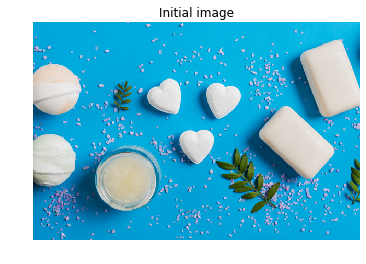

In [11]:
img = plt.imread(r'C:\Users\111\Desktop\Image_processing\coursera\1.jpg')
show_image(img, "Initial image")

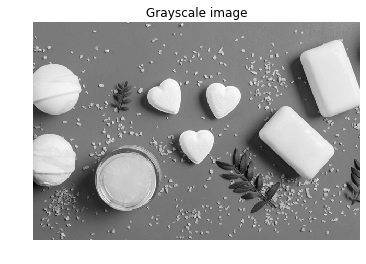

In [12]:
grayscale = rgb_to_gray(img)
show_image(grayscale, 'Grayscale image')

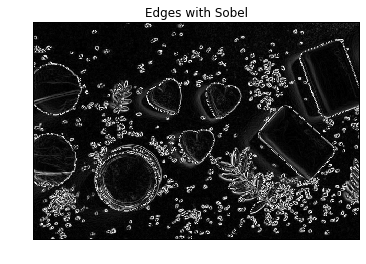

In [27]:
egdes_sobel = sobel(grayscale)
show_image(egdes_sobel, 'Edges with Sobel')
#plt.hist(sobel_tranformed.ravel())
#plt.show()

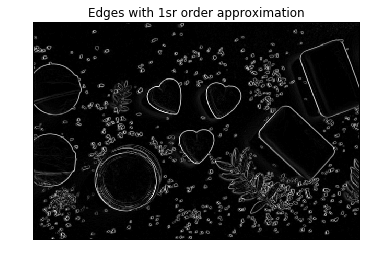

In [28]:
edges_1st_order = edge_detector_1st_order_approx(grayscale)
show_image(edges_1st_order, title = 'Edges with 1st order approximation')

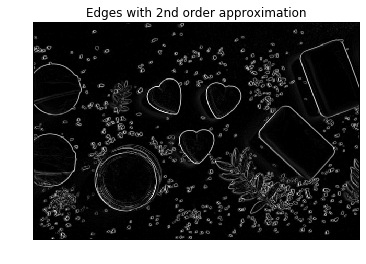

In [47]:
edges_2nd_order = edge_detector_2nd_order_approx(grayscale)
show_image(edges_2nd_order, title = 'Edges with 2nd order approximation')

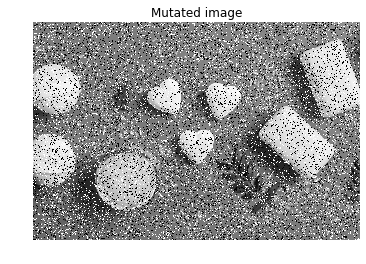

In [48]:
mutated = salt_and_pepper(grayscale, prob = 0.1)
show_image(mutated, 'Mutated image')

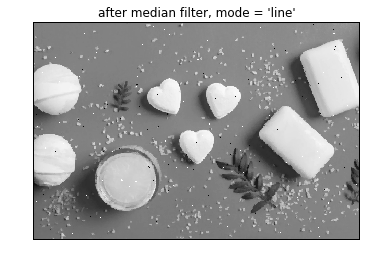

In [50]:
filtered_1 = median_filter(mutated, filter_size = 2, mode = 'line')
show_image(filtered_1, 'after median filter, mode = \'line\'')

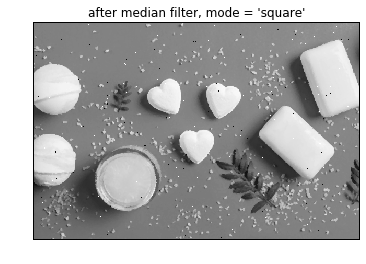

In [51]:
filtered_2 = median_filter(mutated, filter_size = 1, mode = 'square')
show_image(filtered_2, 'after median filter, mode = \'square\'')